In [5]:
pip install --upgrade scikit-image

   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.7 MB 262.6 kB/s eta 0:00:49
   ---------------------------------------- 0.1/12.7 MB 409.6 kB/s eta 0:00:31
   ---------------------------------------- 0.1/12.7 MB 599.1 kB/s eta 0:00:22
    --------------------------------------- 0.2/12.7 MB 827.9 kB/s eta 0:00:16
   - -------------------------------------- 0.4/12.7 MB 1.1 MB/s eta 0:00:11
   - -------------------------------------- 0.5/12.7 MB 1.4 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/12.7 MB 2.0 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/12.7 MB 2.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.5/12.7 MB 3.1 MB/s eta 0:00:04
   ------ --------------------------------- 2.1/12.7 MB 3.9 MB/s eta 0:00:03
   -------- 

In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [8]:
import matplotlib as plt

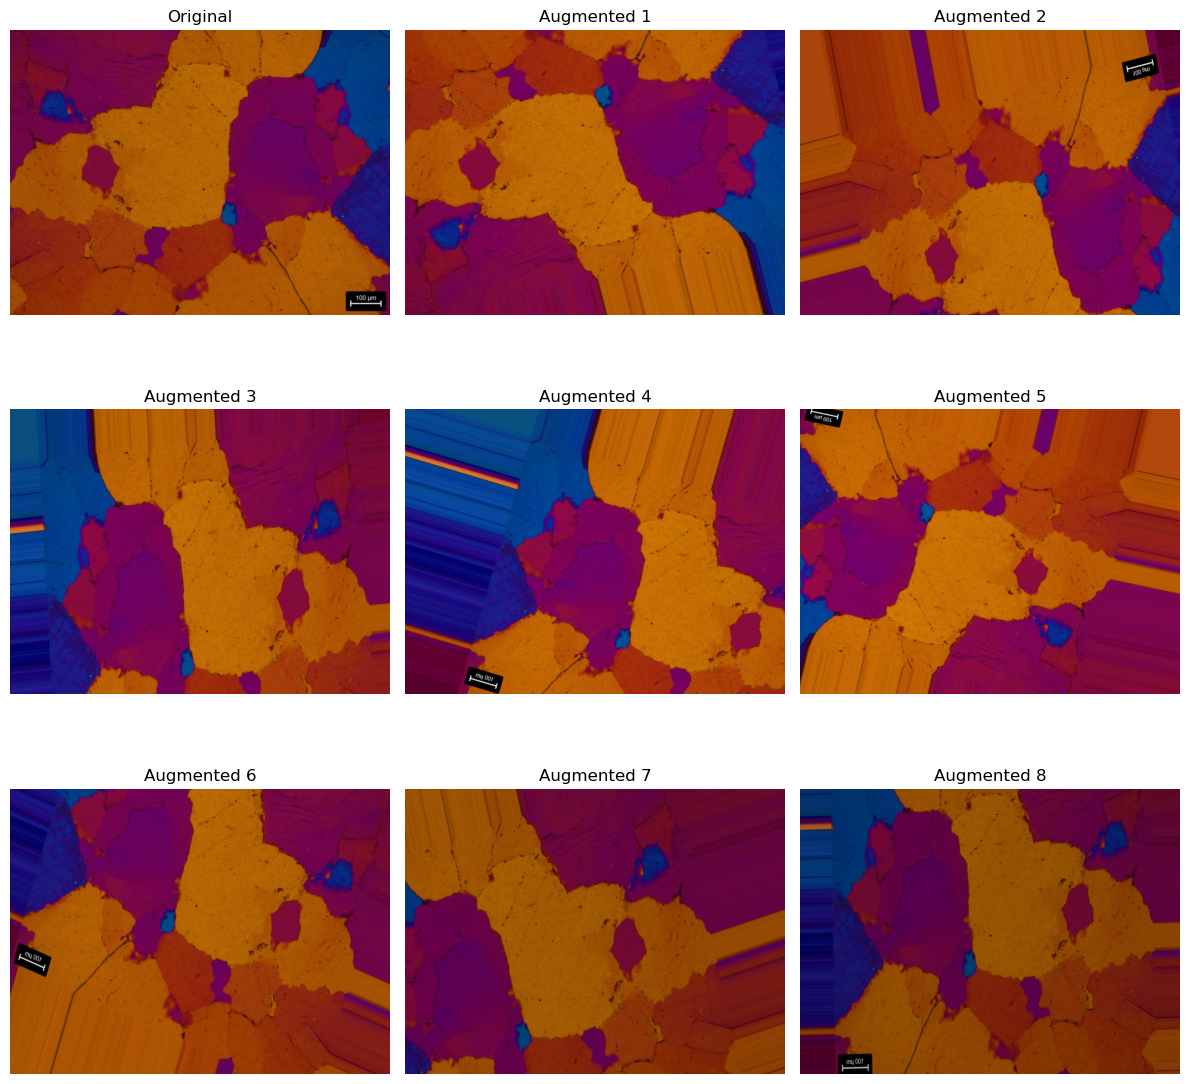

In [11]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('6.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Reshape the image for data augmentation
image = np.expand_dims(image, axis=0)

# Define data augmentation parameters
data_gen = ImageDataGenerator(
    rotation_range=20,          # Rotate by up to 20 degrees
    width_shift_range=0.2,      # Shift horizontally by up to 20%
    height_shift_range=0.2,     # Shift vertically by up to 20%
    zoom_range=0.2,             # Zoom in or out by up to 20%
    horizontal_flip=True,       # Flip horizontally
    vertical_flip=True,         # Flip vertically
    brightness_range=[0.8, 1.2] # Adjust brightness by 20%
)

# Generate augmented images
augmented_images = data_gen.flow(image, batch_size=1, shuffle=False)

# Display the original and augmented images
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
axes = axes.flatten()

# Plot the original image
axes[0].imshow(image[0].astype('uint8'))
axes[0].set_title('Original')
axes[0].axis('off')

# Plot the augmented images
for i in range(1, 9):
    augmented_image = next(augmented_images)[0].astype('uint8')
    axes[i].imshow(augmented_image)
    axes[i].set_title(f'Augmented {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


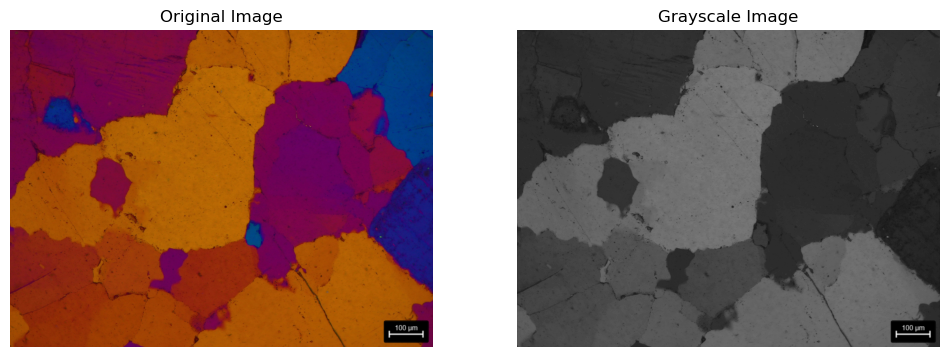

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('6.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(gray_image, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')

plt.show()


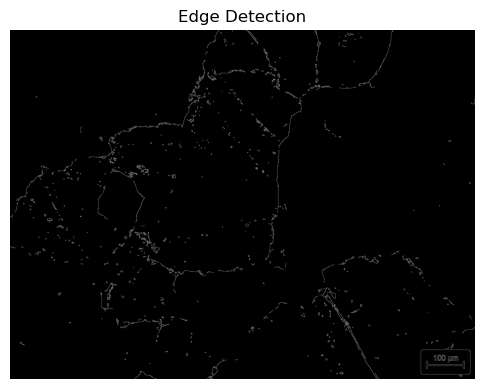

In [14]:
# Apply Canny edge detection
edges = cv2.Canny(gray_image, threshold1=50, threshold2=150)

# Display the edges
plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')
plt.show()


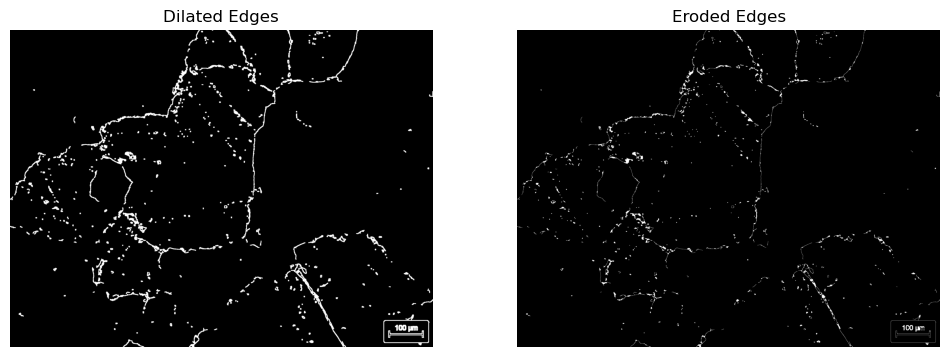

In [15]:
# Define a kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Apply dilation and erosion
dilated_edges = cv2.dilate(edges, kernel, iterations=1)
eroded_edges = cv2.erode(dilated_edges, kernel, iterations=1)

# Display the results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(dilated_edges, cmap='gray')
axes[0].set_title('Dilated Edges')
axes[0].axis('off')

axes[1].imshow(eroded_edges, cmap='gray')
axes[1].set_title('Eroded Edges')
axes[1].axis('off')

plt.show()


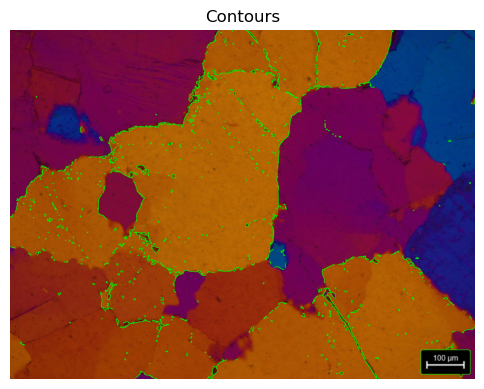

In [16]:
# Find contours
contours, _ = cv2.findContours(eroded_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display the contours
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.axis('off')
plt.show()


In [17]:
# Analyze contour properties
contour_properties = []

for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)
    num_vertices = len(approx)
    
    contour_properties.append({
        'contour': contour,
        'area': area,
        'perimeter': perimeter,
        'num_vertices': num_vertices
    })

# Display some properties of the contours
for i, prop in enumerate(contour_properties[:5]):  # Display properties of the first 5 contours
    print(f"Contour {i+1}: Area = {prop['area']}, Perimeter = {prop['perimeter']}, Vertices = {prop['num_vertices']}")


Contour 1: Area = 18.5, Perimeter = 18.242640614509583, Vertices = 5
Contour 2: Area = 185.5, Perimeter = 58.041630148887634, Vertices = 5
Contour 3: Area = 131.0, Perimeter = 346.73506140708923, Vertices = 4
Contour 4: Area = 12.5, Perimeter = 15.071067690849304, Vertices = 5
Contour 5: Area = 42.0, Perimeter = 28.485281229019165, Vertices = 4


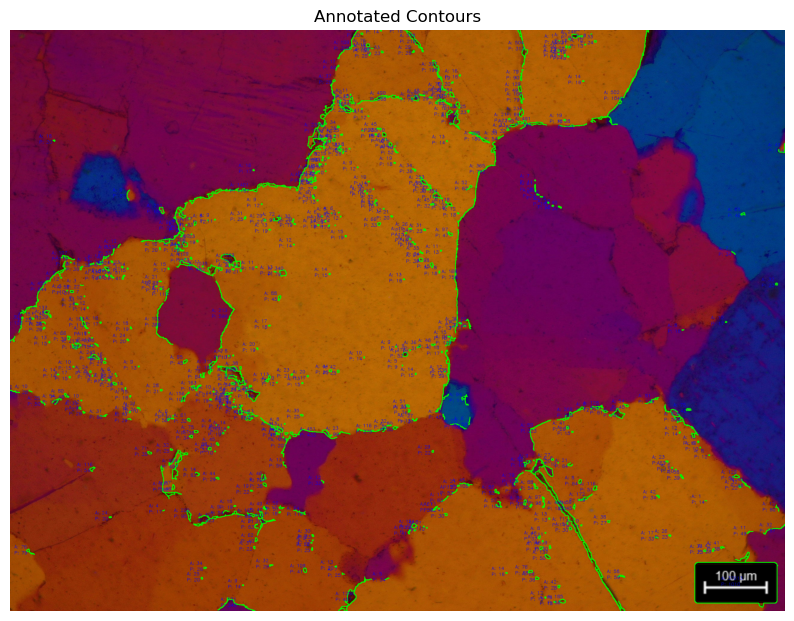

In [18]:
# Create a copy of the original image to draw annotations
annotated_image = image.copy()

# Draw contours and annotate with area and perimeter
for prop in contour_properties:
    contour = prop['contour']
    area = prop['area']
    perimeter = prop['perimeter']
    
    # Draw contour
    cv2.drawContours(annotated_image, [contour], -1, (0, 255, 0), 2)
    
    # Get the contour's centroid to place the text
    M = cv2.moments(contour)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        
        # Annotate with area and perimeter
        cv2.putText(annotated_image, f"A: {int(area)}", (cx - 50, cy - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
        cv2.putText(annotated_image, f"P: {int(perimeter)}", (cx - 50, cy + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title('Annotated Contours')
plt.axis('off')
plt.show()


Contour 1: Solidity = 0.97, Aspect Ratio = 2.12
Contour 2: Solidity = 0.92, Aspect Ratio = 2.13
Contour 3: Solidity = 0.05, Aspect Ratio = 15.15
Contour 4: Solidity = 0.86, Aspect Ratio = 2.13
Contour 5: Solidity = 0.86, Aspect Ratio = 2.20


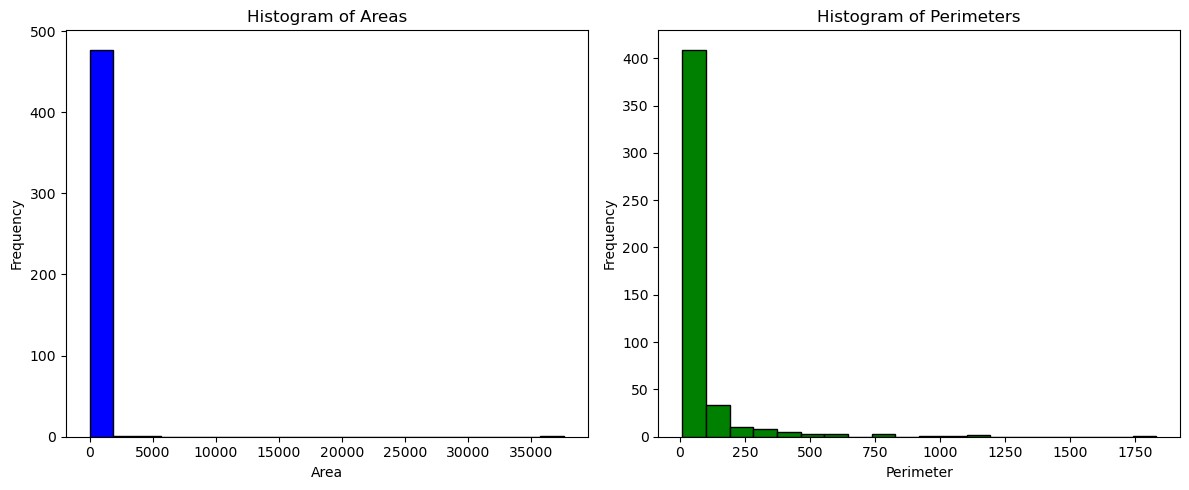

In [19]:
# Additional shape descriptors
for i, prop in enumerate(contour_properties[:5]):  # Analyze the first 5 contours
    hull = cv2.convexHull(prop['contour'])
    hull_area = cv2.contourArea(hull)
    solidity = float(prop['area']) / hull_area if hull_area != 0 else 0
    aspect_ratio = float(prop['perimeter']) / (2 * (prop['area'] ** 0.5)) if prop['area'] != 0 else 0
    
    print(f"Contour {i+1}: Solidity = {solidity:.2f}, Aspect Ratio = {aspect_ratio:.2f}")

# Example of plotting histograms (for all contours)
areas = [prop['area'] for prop in contour_properties]
perimeters = [prop['perimeter'] for prop in contour_properties]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(areas, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Areas')
plt.xlabel('Area')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(perimeters, bins=20, color='green', edgecolor='black')
plt.title('Histogram of Perimeters')
plt.xlabel('Perimeter')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [20]:
# Calculate aspect ratio for each contour
for prop in contour_properties:
    x, y, w, h = cv2.boundingRect(prop['contour'])
    aspect_ratio = float(w) / h
    prop['aspect_ratio'] = aspect_ratio
    print(f"Aspect Ratio: {aspect_ratio:.2f}")


Aspect Ratio: 2.00
Aspect Ratio: 1.57
Aspect Ratio: 2.86
Aspect Ratio: 0.83
Aspect Ratio: 1.00
Aspect Ratio: 1.50
Aspect Ratio: 2.67
Aspect Ratio: 0.86
Aspect Ratio: 1.30
Aspect Ratio: 0.97
Aspect Ratio: 3.00
Aspect Ratio: 1.29
Aspect Ratio: 1.75
Aspect Ratio: 1.67
Aspect Ratio: 0.69
Aspect Ratio: 1.67
Aspect Ratio: 1.17
Aspect Ratio: 2.00
Aspect Ratio: 1.20
Aspect Ratio: 1.51
Aspect Ratio: 1.29
Aspect Ratio: 0.80
Aspect Ratio: 1.35
Aspect Ratio: 0.45
Aspect Ratio: 1.09
Aspect Ratio: 1.67
Aspect Ratio: 0.60
Aspect Ratio: 0.73
Aspect Ratio: 1.25
Aspect Ratio: 0.83
Aspect Ratio: 1.00
Aspect Ratio: 0.79
Aspect Ratio: 1.57
Aspect Ratio: 0.75
Aspect Ratio: 1.29
Aspect Ratio: 1.00
Aspect Ratio: 1.00
Aspect Ratio: 2.75
Aspect Ratio: 1.40
Aspect Ratio: 0.60
Aspect Ratio: 0.90
Aspect Ratio: 1.00
Aspect Ratio: 1.00
Aspect Ratio: 1.00
Aspect Ratio: 2.12
Aspect Ratio: 1.27
Aspect Ratio: 0.88
Aspect Ratio: 0.43
Aspect Ratio: 1.43
Aspect Ratio: 1.00
Aspect Ratio: 1.80
Aspect Ratio: 1.38
Aspect Ratio

In [23]:
# Calculate extent for each contour
for prop in contour_properties:
    x, y, w, h = cv2.boundingRect(prop['contour'])
    rect_area = w * h
    extent = float(prop['area']) / rect_area if rect_area != 0 else 0
    prop['extent'] = extent
    print(f"Extent: {extent:.2f}")


Extent: 0.58
Extent: 0.60
Extent: 0.02
Extent: 0.42
Extent: 0.52
Extent: 0.40


In [24]:
# Calculate solidity for each contour
for prop in contour_properties:
    hull = cv2.convexHull(prop['contour'])
    hull_area = cv2.contourArea(hull)
    solidity = float(prop['area']) / hull_area if hull_area != 0 else 0
    prop['solidity'] = solidity
    print(f"Solidity: {solidity:.2f}")


Solidity: 0.97
Solidity: 0.92
Solidity: 0.05
Solidity: 0.86
Solidity: 0.86
Solidity: 0.83


In [25]:
# Calculate equivalent diameter for each contour
for prop in contour_properties:
    equi_diameter = np.sqrt(4 * prop['area'] / np.pi)
    prop['equivalent_diameter'] = equi_diameter
    print(f"Equivalent Diameter: {equi_diameter:.2f}")


Equivalent Diameter: 4.85
Equivalent Diameter: 15.37
Equivalent Diameter: 12.91
Equivalent Diameter: 3.99
Equivalent Diameter: 7.31
Equivalent Diameter: 3.48


In [26]:
# Calculate orientation for each contour
for prop in contour_properties:
    (x, y), (MA, ma), angle = cv2.fitEllipse(prop['contour']) if len(prop['contour']) >= 5 else (None, None, None)
    prop['orientation'] = angle
    print(f"Orientation: {angle:.2f} degrees")



Orientation: 101.41 degrees
Orientation: 95.47 degrees
Orientation: 87.01 degrees
Orientation: 179.74 degrees
Orientation: 46.55 degrees
Orientation: 76.46 degrees


In [27]:
# Calculate circularity for each contour
for prop in contour_properties:
    circularity = (4 * np.pi * prop['area']) / (prop['perimeter'] ** 2) if prop['perimeter'] != 0 else 0
    prop['circularity'] = circularity
    print(f"Circularity: {circularity:.2f}")


Circularity: 0.70
Circularity: 0.69
Circularity: 0.01
Circularity: 0.69
Circularity: 0.65
Circularity: 0.59


In [28]:
# Calculate eccentricity for each contour
for prop in contour_properties:
    (x, y), (MA, ma), angle = cv2.fitEllipse(prop['contour']) if len(prop['contour']) >= 5 else (None, None, None)
    eccentricity = np.sqrt(1 - (MA/ma)**2) if MA and ma else 0
    prop['eccentricity'] = eccentricity
    print(f"Eccentricity: {eccentricity:.2f}")


Eccentricity: 0.74
Eccentricity: 0.81
Eccentricity: 0.91
Eccentricity: 0.53
Eccentricity: 0.56
Eccentricity: 0.75


In [29]:
# Calculate convexity defects for each contour
for prop in contour_properties:
    hull = cv2.convexHull(prop['contour'], returnPoints=False)
    if len(hull) > 3:
        defects = cv2.convexityDefects(prop['contour'], hull)
        prop['defects'] = defects
        print(f"Number of convexity defects: {defects.shape[0]}")


Number of convexity defects: 1
Number of convexity defects: 9
Number of convexity defects: 4
Number of convexity defects: 3
Number of convexity defects: 4
Number of convexity defects: 3


In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '6.jpg'  # Replace with the correct path to your image
image = cv2.imread(image_path)

# Check if the image is loaded properly
if image is None:
    print(f"Error: Could not load image at {image_path}")
else:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, threshold1=50, threshold2=150)

    # Define a kernel for morphological operations
    kernel = np.ones((5, 5), np.uint8)

    # Apply dilation and erosion
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)
    eroded_edges = cv2.erode(dilated_edges, kernel, iterations=1)

    # Find contours
    contours, _ = cv2.findContours(eroded_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Analyze contour properties
    contour_properties = []

    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)
        num_vertices = len(approx)
        x, y, w, h = cv2.boundingRect(contour)
        rect_area = w * h
        extent = float(area) / rect_area if rect_area != 0 else 0
        hull = cv2.convexHull(contour)
        hull_area = cv2.contourArea(hull)
        solidity = float(area) / hull_area if hull_area != 0 else 0
        equi_diameter = np.sqrt(4 * area / np.pi)
        (cx, cy), (MA, ma), angle = cv2.fitEllipse(contour) if len(contour) >= 5 else (None, None, None)
        eccentricity = np.sqrt(1 - (MA/ma)**2) if MA and ma else 0
        circularity = (4 * np.pi * area) / (perimeter ** 2) if perimeter != 0 else 0
        
        # Calculate convexity defects only if the hull is valid
        defects = None
        if len(hull) > 3:
            try:
                hull_indices = cv2.convexHull(contour, returnPoints=False)
                defects = cv2.convexityDefects(contour, hull_indices)
            except cv2.error as e:
                print(f"Error calculating convexity defects for contour: {e}")

        contour_properties.append({
            'contour': contour,
            'area': area,
            'perimeter': perimeter,
            'num_vertices': num_vertices,
            'aspect_ratio': float(w) / h,
            'extent': extent,
            'solidity': solidity,
            'equivalent_diameter': equi_diameter,
            'orientation': angle,
            'eccentricity': eccentricity,
            'circularity': circularity,
            'defects': defects
        })

    # Display some properties of the contours
    for i, prop in enumerate(contour_properties[:5]):  # Display properties of the first 5 contours
        print(f"Contour {i+1}: Area = {prop['area']}, Perimeter = {prop['perimeter']}, Vertices = {prop['num_vertices']}, Aspect Ratio = {prop['aspect_ratio']:.2f}, Extent = {prop['extent']:.2f}, Solidity = {prop['solidity']:.2f}, Equivalent Diameter = {prop['equivalent_diameter']:.2f}, Orientation = {prop['orientation']:.2f}, Eccentricity = {prop['eccentricity']:.2f}, Circularity = {prop['circularity']:.2f}, Defects = {prop['defects'].shape[0] if prop['defects'] is not None else 0}")

    # Visualize the annotated contours
    annotated_image = image.copy()
    for prop in contour_properties:
        contour = prop['contour']
        cv2.drawContours(annotated_image, [contour], -1, (0, 255, 0), 2)
        M = cv2.moments(contour)
        if M['m00'] != 0:
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            cv2.putText(annotated_image, f"A: {int(prop['area'])}", (cx - 50, cy - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
            cv2.putText(annotated_image, f"P: {int(prop['perimeter'])}", (cx - 50, cy + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Display the annotated image
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.title('Annotated Contours')
    plt.axis('off')
    plt.show()


Error calculating convexity defects for contour: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\convhull.cpp:360: error: (-5:Bad argument) The convex hull indices are not monotonous, which can be in the case when the input contour contains self-intersections in function 'cv::convexityDefects'

Error calculating convexity defects for contour: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\convhull.cpp:360: error: (-5:Bad argument) The convex hull indices are not monotonous, which can be in the case when the input contour contains self-intersections in function 'cv::convexityDefects'

Error calculating convexity defects for contour: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\convhull.cpp:360: error: (-5:Bad argument) The convex hull indices are not monotonous, which can be in the case when the input contour contains self-intersections in function 'cv::convexityDefects'

Error calculating convexity defect

TypeError: cannot unpack non-iterable NoneType object

Error calculating convexity defects for contour: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\convhull.cpp:360: error: (-5:Bad argument) The convex hull indices are not monotonous, which can be in the case when the input contour contains self-intersections in function 'cv::convexityDefects'

Error calculating convexity defects for contour: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\convhull.cpp:360: error: (-5:Bad argument) The convex hull indices are not monotonous, which can be in the case when the input contour contains self-intersections in function 'cv::convexityDefects'

Error calculating convexity defects for contour: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\convhull.cpp:360: error: (-5:Bad argument) The convex hull indices are not monotonous, which can be in the case when the input contour contains self-intersections in function 'cv::convexityDefects'

Error calculating convexity defect

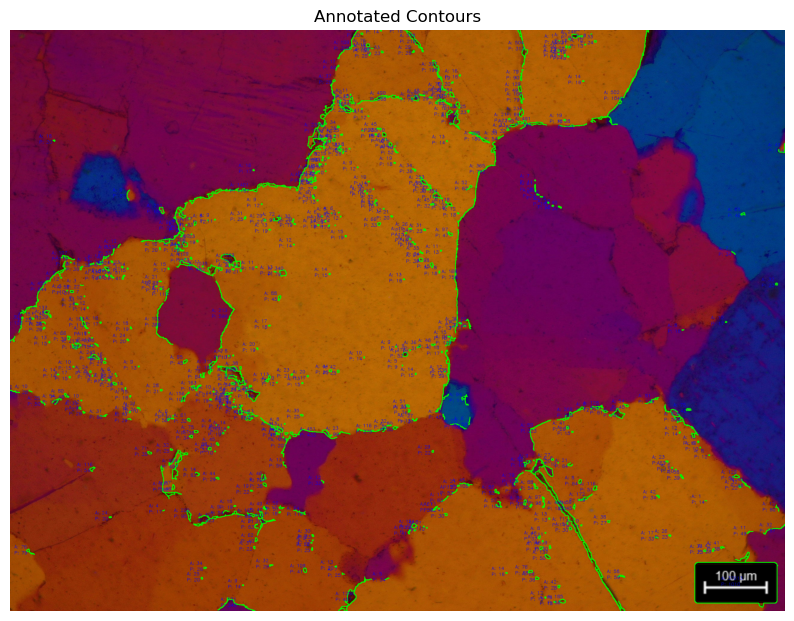

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '6.jpg'  # Replace with the correct path to your image
image = cv2.imread(image_path)

# Check if the image is loaded properly
if image is None:
    print(f"Error: Could not load image at {image_path}")
else:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, threshold1=50, threshold2=150)

    # Define a kernel for morphological operations
    kernel = np.ones((5, 5), np.uint8)

    # Apply dilation and erosion
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)
    eroded_edges = cv2.erode(dilated_edges, kernel, iterations=1)

    # Find contours
    contours, _ = cv2.findContours(eroded_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Analyze contour properties
    contour_properties = []

    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)
        num_vertices = len(approx)
        x, y, w, h = cv2.boundingRect(contour)
        rect_area = w * h
        extent = float(area) / rect_area if rect_area != 0 else 0
        hull = cv2.convexHull(contour)
        hull_area = cv2.contourArea(hull)
        solidity = float(area) / hull_area if hull_area != 0 else 0
        equi_diameter = np.sqrt(4 * area / np.pi)

        if len(contour) >= 5:
            (cx, cy), (MA, ma), angle = cv2.fitEllipse(contour)
            eccentricity = np.sqrt(1 - (MA / ma) ** 2) if MA and ma else 0
        else:
            cx, cy, MA, ma, angle, eccentricity = None, None, None, None, None, 0

        circularity = (4 * np.pi * area) / (perimeter ** 2) if perimeter != 0 else 0

        # Calculate convexity defects only if the hull is valid
        defects = None
        if len(hull) > 3:
            try:
                hull_indices = cv2.convexHull(contour, returnPoints=False)
                defects = cv2.convexityDefects(contour, hull_indices)
            except cv2.error as e:
                print(f"Error calculating convexity defects for contour: {e}")

        contour_properties.append({
            'contour': contour,
            'area': area,
            'perimeter': perimeter,
            'num_vertices': num_vertices,
            'aspect_ratio': float(w) / h,
            'extent': extent,
            'solidity': solidity,
            'equivalent_diameter': equi_diameter,
            'orientation': angle,
            'eccentricity': eccentricity,
            'circularity': circularity,
            'defects': defects
        })

    # Display some properties of the contours
    for i, prop in enumerate(contour_properties[:5]):  # Display properties of the first 5 contours
        print(f"Contour {i+1}: Area = {prop['area']}, Perimeter = {prop['perimeter']}, Vertices = {prop['num_vertices']}, Aspect Ratio = {prop['aspect_ratio']:.2f}, Extent = {prop['extent']:.2f}, Solidity = {prop['solidity']:.2f}, Equivalent Diameter = {prop['equivalent_diameter']:.2f}, Orientation = {prop['orientation']:.2f}, Eccentricity = {prop['eccentricity']:.2f}, Circularity = {prop['circularity']:.2f}, Defects = {prop['defects'].shape[0] if prop['defects'] is not None else 0}")

    # Visualize the annotated contours
    annotated_image = image.copy()
    for prop in contour_properties:
        contour = prop['contour']
        cv2.drawContours(annotated_image, [contour], -1, (0, 255, 0), 2)
        M = cv2.moments(contour)
        if M['m00'] != 0:
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            cv2.putText(annotated_image, f"A: {int(prop['area'])}", (cx - 50, cy - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
            cv2.putText(annotated_image, f"P: {int(prop['perimeter'])}", (cx - 50, cy + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Display the annotated image
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.title('Annotated Contours')
    plt.axis('off')
    plt.show()


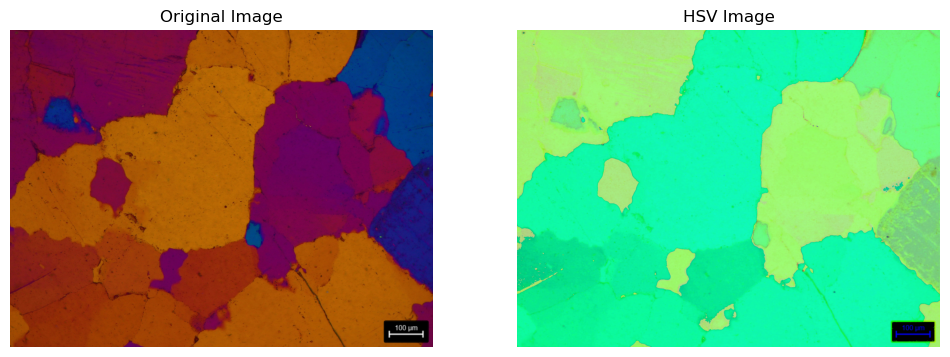

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '6.jpg'  # Replace with the correct path to your image
image = cv2.imread(image_path)

# Check if the image is loaded properly
if image is None:
    print(f"Error: Could not load image at {image_path}")
else:
    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Display the original and preprocessed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(hsv_image)
    plt.title('HSV Image')
    plt.axis('off')
    plt.show()


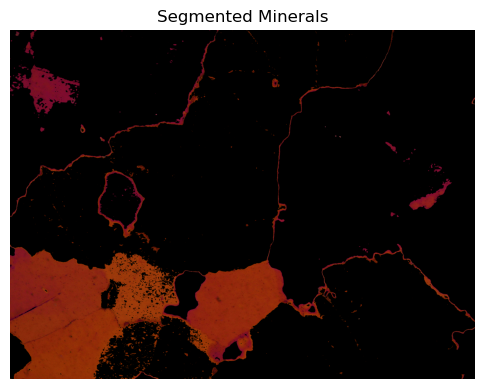

In [35]:
# Define color ranges for segmentation (example ranges, adjust as needed)
lower_color1 = np.array([0, 50, 50])
upper_color1 = np.array([10, 255, 255])
lower_color2 = np.array([170, 50, 50])
upper_color2 = np.array([180, 255, 255])

# Segment the minerals
mask1 = cv2.inRange(hsv_image, lower_color1, upper_color1)
mask2 = cv2.inRange(hsv_image, lower_color2, upper_color2)
mask = cv2.bitwise_or(mask1, mask2)

# Apply the mask to get the segmented image
segmented_image = cv2.bitwise_and(image, image, mask=mask)

# Display the segmented image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Minerals')
plt.axis('off')
plt.show()


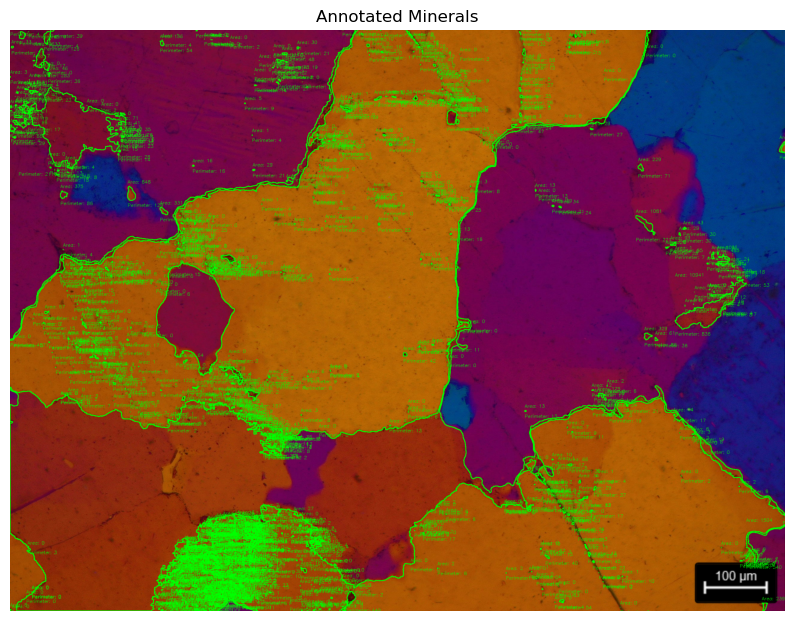

In [36]:
# Convert mask to binary image
ret, binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Annotate the original image with contour properties
annotated_image = image.copy()

for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    x, y, w, h = cv2.boundingRect(contour)
    cv2.drawContours(annotated_image, [contour], -1, (0, 255, 0), 2)
    cv2.putText(annotated_image, f"Area: {int(area)}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    cv2.putText(annotated_image, f"Perimeter: {int(perimeter)}", (x, y + h + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title('Annotated Minerals')
plt.axis('off')
plt.show()


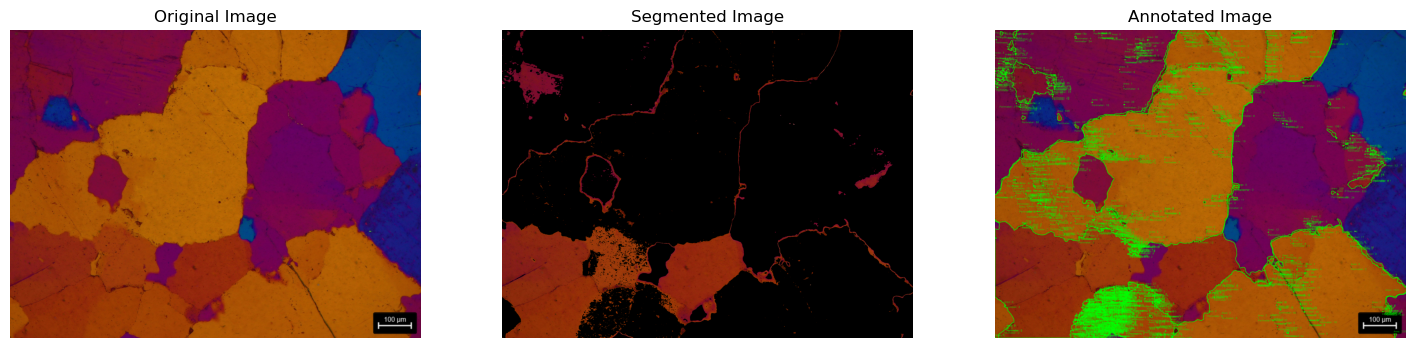

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '6.jpg'  # Replace with the correct path to your image
image = cv2.imread(image_path)

# Check if the image is loaded properly
if image is None:
    print(f"Error: Could not load image at {image_path}")
else:
    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define color ranges for segmentation (example ranges, adjust as needed)
    # These ranges may need to be adjusted based on the specific minerals in the image
    lower_color1 = np.array([0, 50, 50])
    upper_color1 = np.array([10, 255, 255])
    lower_color2 = np.array([170, 50, 50])
    upper_color2 = np.array([180, 255, 255])

    # Segment the minerals
    mask1 = cv2.inRange(hsv_image, lower_color1, upper_color1)
    mask2 = cv2.inRange(hsv_image, lower_color2, upper_color2)
    mask = cv2.bitwise_or(mask1, mask2)

    # Apply the mask to get the segmented image
    segmented_image = cv2.bitwise_and(image, image, mask=mask)

    # Convert mask to binary image
    ret, binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Annotate the original image with contour properties
    annotated_image = image.copy()

    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        x, y, w, h = cv2.boundingRect(contour)
        cv2.drawContours(annotated_image, [contour], -1, (0, 255, 0), 2)
        cv2.putText(annotated_image, f"Area: {int(area)}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
        cv2.putText(annotated_image, f"Perimeter: {int(perimeter)}", (x, y + h + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # Display the original, segmented, and annotated images
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.title('Annotated Image')
    plt.axis('off')

    plt.show()


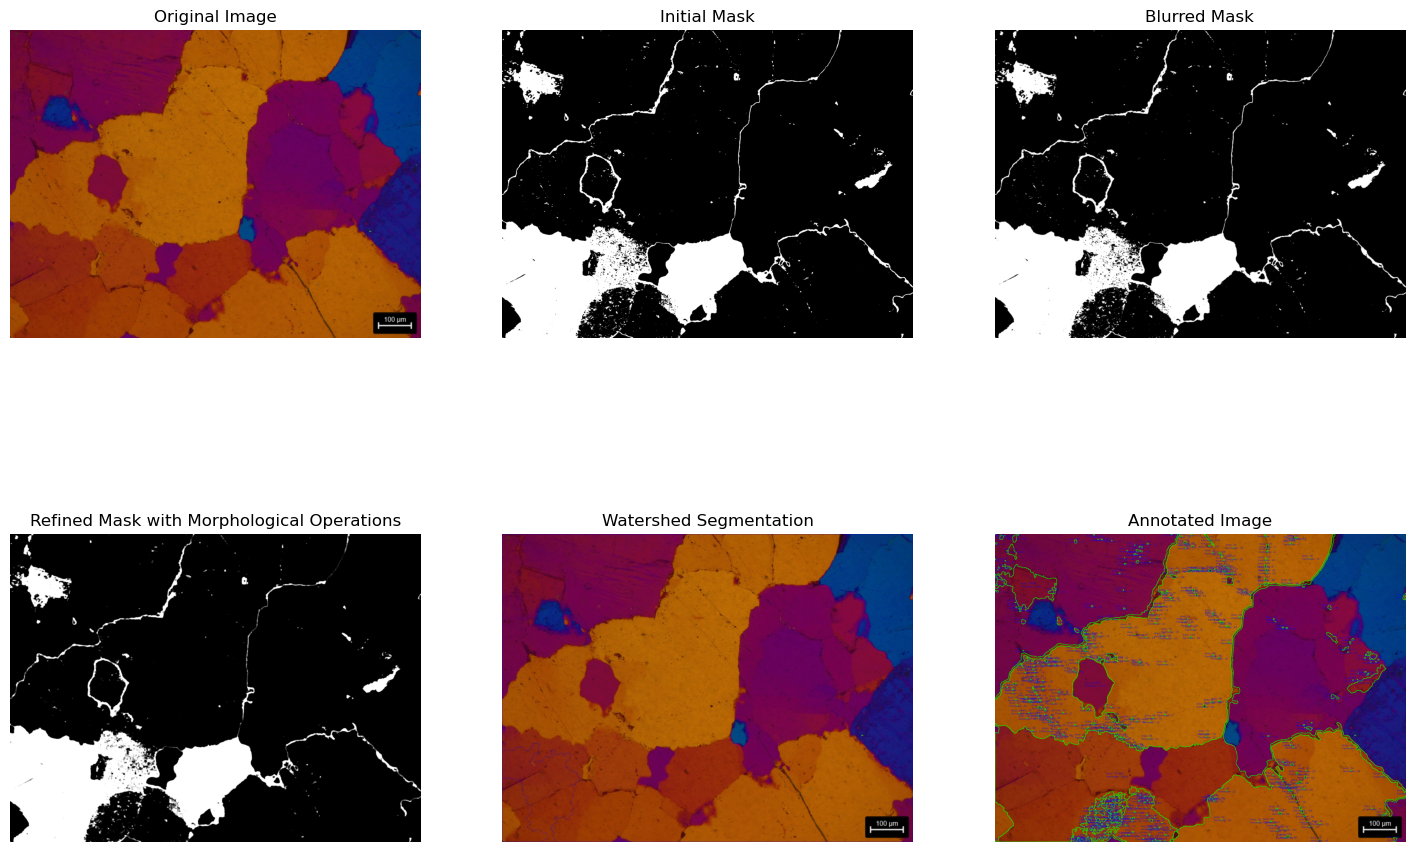

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '6.jpg'  # Replace with the correct path to your image
image = cv2.imread(image_path)

# Check if the image is loaded properly
if image is None:
    print(f"Error: Could not load image at {image_path}")
else:
    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define color ranges for segmentation (example ranges, adjust as needed)
    lower_color1 = np.array([0, 50, 50])
    upper_color1 = np.array([10, 255, 255])
    lower_color2 = np.array([170, 50, 50])
    upper_color2 = np.array([180, 255, 255])

    # Segment the minerals
    mask1 = cv2.inRange(hsv_image, lower_color1, upper_color1)
    mask2 = cv2.inRange(hsv_image, lower_color2, upper_color2)
    mask = cv2.bitwise_or(mask1, mask2)

    # Apply Gaussian Blur to the mask
    blurred_mask = cv2.GaussianBlur(mask, (5, 5), 0)

    # Apply morphological operations to refine the mask
    kernel = np.ones((5, 5), np.uint8)
    opened_mask = cv2.morphologyEx(blurred_mask, cv2.MORPH_OPEN, kernel)
    closed_mask = cv2.morphologyEx(opened_mask, cv2.MORPH_CLOSE, kernel)

    # Distance transform and watershed segmentation
    dist_transform = cv2.distanceTransform(closed_mask, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(closed_mask, sure_fg)
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    watershed_image = image.copy()
    markers = cv2.watershed(watershed_image, markers)
    watershed_image[markers == -1] = [255, 0, 0]

    # Find contours in the refined mask
    contours, _ = cv2.findContours(closed_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Annotate the original image with contour properties
    annotated_image = image.copy()

    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        x, y, w, h = cv2.boundingRect(contour)
        rect_area = w * h
        extent = float(area) / rect_area if rect_area != 0 else 0
        hull = cv2.convexHull(contour)
        hull_area = cv2.contourArea(hull)
        solidity = float(area) / hull_area if hull_area != 0 else 0
        equi_diameter = np.sqrt(4 * area / np.pi)

        if len(contour) >= 5:
            (cx, cy), (MA, ma), angle = cv2.fitEllipse(contour)
            eccentricity = np.sqrt(1 - (MA / ma) ** 2) if MA and ma else 0
        else:
            cx, cy, MA, ma, angle, eccentricity = None, None, None, None, None, 0

        circularity = (4 * np.pi * area) / (perimeter ** 2) if perimeter != 0 else 0

        # Calculate convexity defects only if the hull is valid
        defects = None
        if len(hull) > 3:
            try:
                hull_indices = cv2.convexHull(contour, returnPoints=False)
                defects = cv2.convexityDefects(contour, hull_indices)
            except cv2.error as e:
                print(f"Error calculating convexity defects for contour: {e}")

        # Draw contours and annotate properties
        cv2.drawContours(annotated_image, [contour], -1, (0, 255, 0), 2)
        M = cv2.moments(contour)
        if M['m00'] != 0:
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            cv2.putText(annotated_image, f"Area: {int(area)}", (cx - 50, cy - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
            cv2.putText(annotated_image, f"Perimeter: {int(perimeter)}", (cx - 50, cy + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Display the original, segmented, and annotated images
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Initial Mask')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(blurred_mask, cmap='gray')
    plt.title('Blurred Mask')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(closed_mask, cmap='gray')
    plt.title('Refined Mask with Morphological Operations')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(cv2.cvtColor(watershed_image, cv2.COLOR_BGR2RGB))
    plt.title('Watershed Segmentation')
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.title('Annotated Image')
    plt.axis('off')

    plt.show()


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the image
image_path = '6.jpg'  # Replace with the correct path to your image
image = cv2.imread(image_path)

# Check if the image is loaded properly
if image is None:
    print(f"Error: Could not load image at {image_path}")
else:
    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define color ranges for segmentation (example ranges, adjust as needed)
    lower_color1 = np.array([0, 50, 50])
    upper_color1 = np.array([10, 255, 255])
    lower_color2 = np.array([170, 50, 50])
    upper_color2 = np.array([180, 255, 255])

    # Segment the minerals
    mask1 = cv2.inRange(hsv_image, lower_color1, upper_color1)
    mask2 = cv2.inRange(hsv_image, lower_color2, upper_color2)
    mask = cv2.bitwise_or(mask1, mask2)

    # Apply Gaussian Blur to the mask
    blurred_mask = cv2.GaussianBlur(mask, (5, 5), 0)

    # Apply morphological operations to refine the mask
    kernel = np.ones((5, 5), np.uint8)
    opened_mask = cv2.morphologyEx(blurred_mask, cv2.MORPH_OPEN, kernel)
    closed_mask = cv2.morphologyEx(opened_mask, cv2.MORPH_CLOSE, kernel)

    # Experiment with different kernel sizes and operations
    kernel_large = np.ones((10, 10), np.uint8)
    closed_mask_large = cv2.morphologyEx(closed_mask, cv2.MORPH_CLOSE, kernel_large)

    # Distance transform and watershed segmentation
    dist_transform = cv2.distanceTransform(closed_mask_large, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(closed_mask_large, sure_fg)
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    watershed_image = image.copy()
    markers = cv2.watershed(watershed_image, markers)
    watershed_image[markers == -1] = [255, 0, 0]

    # Find contours in the refined mask
    contours, _ = cv2.findContours(closed_mask_large, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Annotate the original image with contour properties
    annotated_image = image.copy()
    contour_features = []

    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        x, y, w, h = cv2.boundingRect(contour)
        rect_area = w * h
        extent = float(area) / rect_area if rect_area != 0 else 0
        hull = cv2.convexHull(contour)
        hull_area = cv2.contourArea(hull)
        solidity = float(area) / hull_area if hull_area != 0 else 0
        equi_diameter = np.sqrt(4 * area / np.pi)

        if len(contour) >= 5:
            (cx, cy), (MA, ma), angle = cv2.fitEllipse(contour)
            eccentricity = np.sqrt(1 - (MA / ma) ** 2) if MA and ma else 0
        else:
            cx, cy, MA, ma, angle, eccentricity = None, None, None, None, None, 0

        circularity = (4 * np.pi * area) / (perimeter ** 2) if perimeter != 0 else 0

        # Extract texture features using Laplacian and Sobel filters
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        mask_roi = np.zeros_like(gray_image)
        cv2.drawContours(mask_roi, [contour], -1, 255, -1)
        texture_image = cv2.bitwise_and(gray_image, gray_image, mask=mask_roi)
        
        # Laplacian for texture
        laplacian = cv2.Laplacian(texture_image, cv2.CV_64F).var()

        # Sobel for texture
        sobelx = cv2.Sobel(texture_image, cv2.CV_64F, 1, 0, ksize=5).var()
        sobely = cv2.Sobel(texture_image, cv2.CV_64F, 0, 1, ksize=5).var()

        contour_features.append([
            area, perimeter, extent, solidity, equi_diameter, eccentricity,
            circularity, laplacian, sobelx, sobely
        ])

        # Draw contours and annotate properties
        cv2.drawContours(annotated_image, [contour], -1, (0, 255, 0), 2)
        M = cv2.moments(contour)
        if M['m00'] != 0:
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            cv2.putText(annotated_image, f"Area: {int(area)}", (cx - 50, cy - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
            cv2.putText(annotated_image, f"Perimeter: {int(perimeter)}", (cx - 50, cy + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Convert contour features to numpy array for machine learning
    contour_features = np.array(contour_features)

    # Standardize the features
    scaler = StandardScaler()
    contour_features_scaled = scaler.fit_transform(contour_features)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
    kmeans.fit(contour_features_scaled)
    labels = kmeans.labels_

    # Annotate image with cluster labels
    for i, contour in enumerate(contours):
        M = cv2.moments(contour)
        if M['m00'] != 0:
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            cv2.putText(annotated_image, f"Cluster: {labels[i]}", (cx - 50, cy + 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 1)

    # Display the original, segmented, and annotated images
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Initial Mask')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(blurred_mask, cmap='gray')
    plt.title('Blurred Mask')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(closed_mask_large, cmap='gray')
    plt.title('Refined Mask with Morphological Operations')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(cv2.cvtColor(watershed_image, cv2.COLOR_BGR2RGB))
    plt.title('Watershed Segmentation')
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.title('Annotated Image with Clusters')
    plt.axis('off')

    plt.show()


C:\Users\Pranav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [8]:
pip install --upgrade scikit-image


Note: you may need to restart the kernel to use updated packages.
